# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [53]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [54]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nemuro
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | enewetak
Processing Record 4 of Set 1 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | bengkulu
Processing Record 8 of Set 1 | kievka
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | afaahiti
Processing Record 12 of Set 1 | cabedelo
Processing Record 13 of Set 1 | arraial do cabo
Processing Record 14 of Set 1 | taoudenni
Processing Record 15 of Set 1 | jhunjhunun
Processing Record 16 of Set 1 | pandan
Processing Record 17 of Set 1 | taltal
Processing Record 18 of Set 1 | sayat
Processing Record 19 of Set 1 | broceni
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | ilulissat
Processing Record 22 of Set 1 | margaret river
Process

In [60]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [61]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nemuro,43.3236,145.5750,14.96,82,5,2.72,JP,1724182883
1,tiksi,71.6872,128.8694,3.55,93,100,3.30,RU,1724182884
2,enewetak,11.3474,162.3373,28.33,79,81,6.42,MH,1724182886
3,adamstown,-25.0660,-130.1015,17.79,58,99,8.18,PN,1724182888
4,hermanus,-34.4187,19.2345,10.45,84,0,4.47,ZA,1724182889


In [62]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [63]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nemuro,43.3236,145.5750,14.96,82,5,2.72,JP,1724182883
1,tiksi,71.6872,128.8694,3.55,93,100,3.30,RU,1724182884
2,enewetak,11.3474,162.3373,28.33,79,81,6.42,MH,1724182886
3,adamstown,-25.0660,-130.1015,17.79,58,99,8.18,PN,1724182888
4,hermanus,-34.4187,19.2345,10.45,84,0,4.47,ZA,1724182889


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

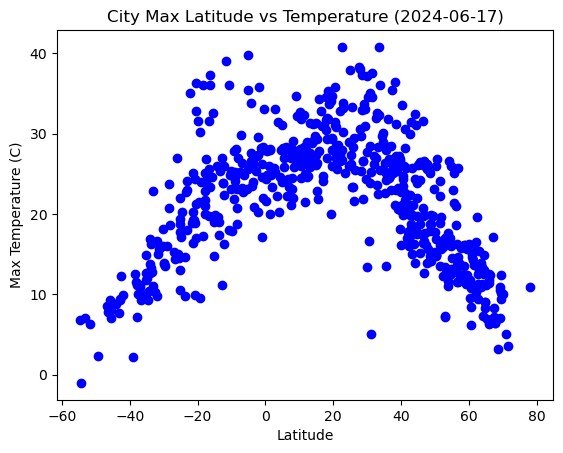

In [64]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color = "blue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs Temperature (2024-06-17)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

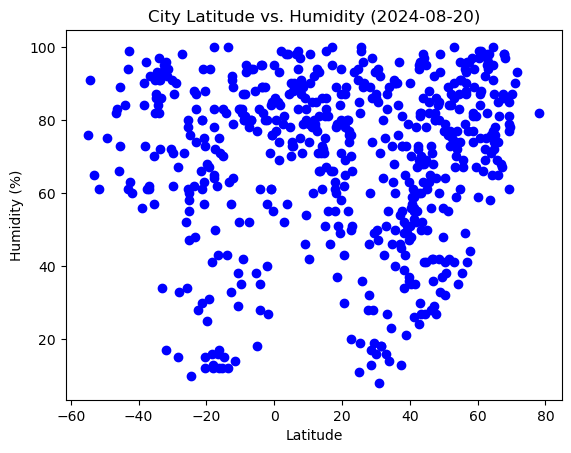

In [65]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color = "blue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

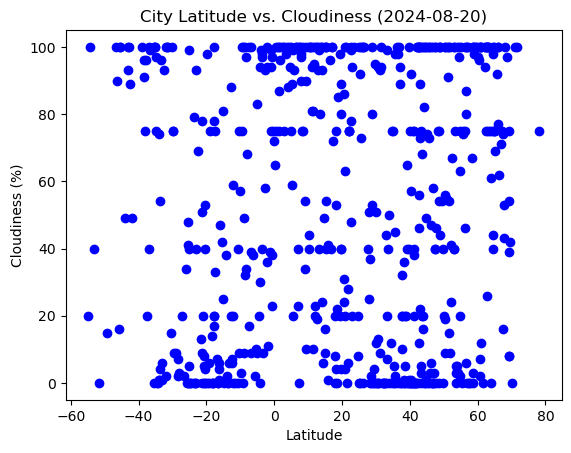

In [66]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color = "blue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

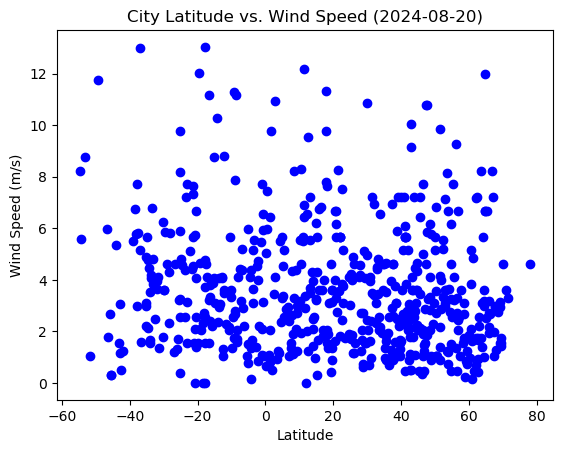

In [67]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color = "blue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [68]:
# Define a function to create Linear Regression plots
def linear_regression(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    return regress_values, rvalue**2, line_eq

In [69]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nemuro,43.3236,145.5750,14.96,82,5,2.72,JP,1724182883
1,tiksi,71.6872,128.8694,3.55,93,100,3.30,RU,1724182884
2,enewetak,11.3474,162.3373,28.33,79,81,6.42,MH,1724182886
6,kievka,50.2619,71.5514,14.72,79,100,2.70,KZ,1724182891
12,taoudenni,22.6783,-3.9836,40.77,20,78,2.44,ML,1724182898


In [70]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,adamstown,-25.0660,-130.1015,17.79,58,99,8.18,PN,1724182888
4,hermanus,-34.4187,19.2345,10.45,84,0,4.47,ZA,1724182889
5,bengkulu,-3.8004,102.2655,23.48,95,99,1.68,ID,1724182890
7,waitangi,-43.9535,-176.5597,8.79,84,49,5.36,NZ,1724182892
8,puerto ayora,-0.7393,-90.3518,21.97,85,23,3.13,EC,1724182893


###  Temperature vs. Latitude Linear Regression Plot

r^2 value is: 0.5170249272197622


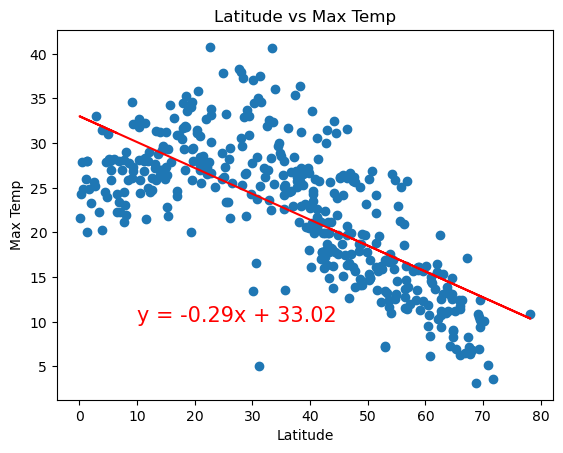

In [76]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

regress_values, r_squared, line_eq = linear_regression(x_values, y_values)

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq, (10, 10), fontsize=15, color="red")
plt.title("Latitude vs Max Temp")
print(f"r^2 value is: {r_squared}")

plt.show()




r^2 value is: 0.584913772806899


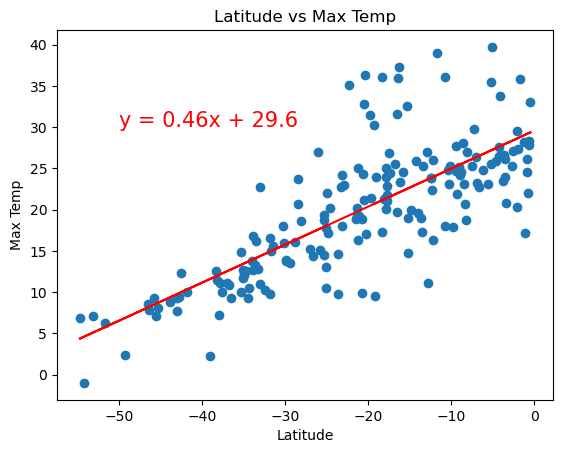

In [89]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

regress_values, r_squared, line_eq = linear_regression(x_values, y_values)

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Latitude vs Max Temp")
plt.annotate(line_eq, xy=(-50, 30), fontsize=15, color="red")
print(f"r^2 value is: {r_squared}")

plt.show()

**Discussion about the linear relationship:** For the Northern hemisphere there is a negative correlation between the latitude and max temp, as the lattitude went up, the temp dropped. On the other hand, the Southern hemisphere had a moderately positive correlation, with an r^2 value of about .58, as the latitude went up, so did the temp.

### Humidity vs. Latitude Linear Regression Plot

r^2 value is: 0.00015040856071402582


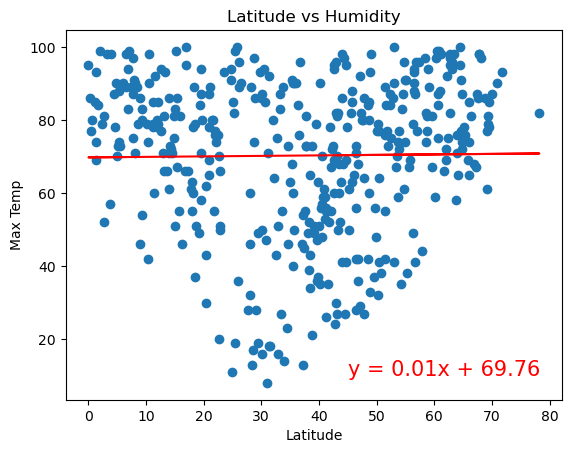

In [91]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

regress_values, r_squared, line_eq = linear_regression(x_values, y_values)

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq, (45, 10), fontsize=15, color="red")
plt.title("Latitude vs Humidity")
print(f"r^2 value is: {r_squared}")

plt.show()

r^2 value is: 0.019615837781934473


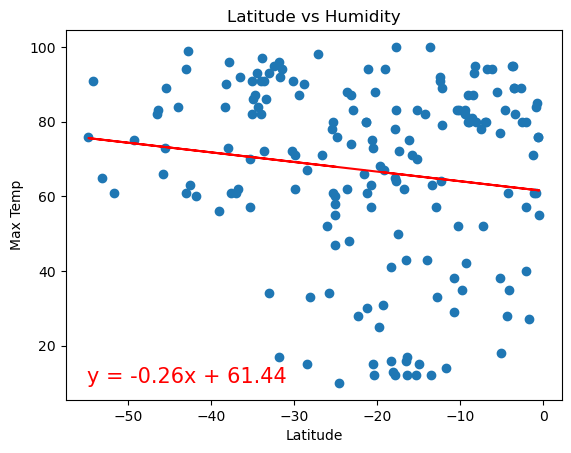

In [94]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

regress_values, r_squared, line_eq = linear_regression(x_values, y_values)

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq, (-55, 10), fontsize=15, color="red")
plt.title("Latitude vs Humidity")
print(f"r^2 value is: {r_squared}")

plt.show()

**Discussion about the linear relationship:**  For both the Northern and Southern hemispheres, there is basically no correlation between latitude and humidity. There may be an extremel weak one for the Southern hemisphere, but it is basicallyy nonexistant. 

### Cloudiness vs. Latitude Linear Regression Plot

r^2 value is: 0.004436314272382556


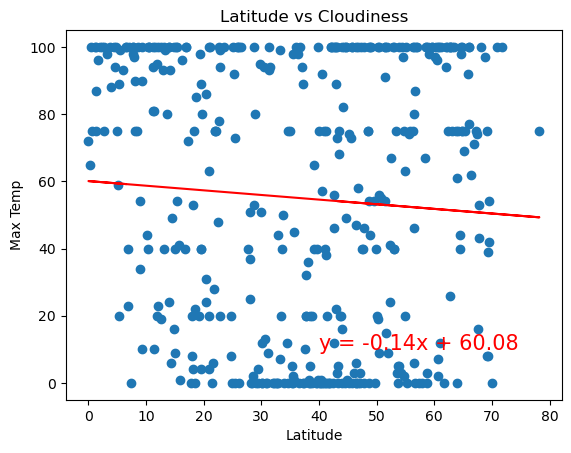

In [95]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

regress_values, r_squared, line_eq = linear_regression(x_values, y_values)

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq, (40, 10), fontsize=15, color="red")
plt.title("Latitude vs Cloudiness")
print(f"r^2 value is: {r_squared}")

plt.show()

r^2 value is: 0.010384805629314452


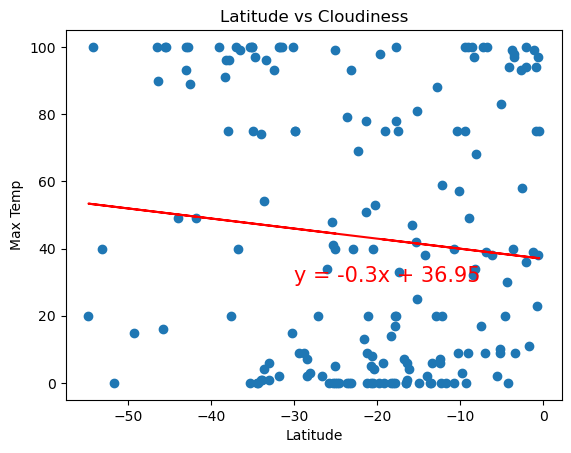

In [96]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

regress_values, r_squared, line_eq = linear_regression(x_values, y_values)

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq, (-30, 30), fontsize=15, color="red")
plt.title("Latitude vs Cloudiness")
print(f"r^2 value is: {r_squared}")

plt.show()

**Discussion about the linear relationship:** For both the Northern and Southern hemispheres, there is basically no correlation between latitude and cloudiness. There may be an extremel weak one for the Southern hemisphere, but it is basicallyy nonexistant. 

### Wind Speed vs. Latitude Linear Regression Plot

r^2 value is: 0.008447384531839


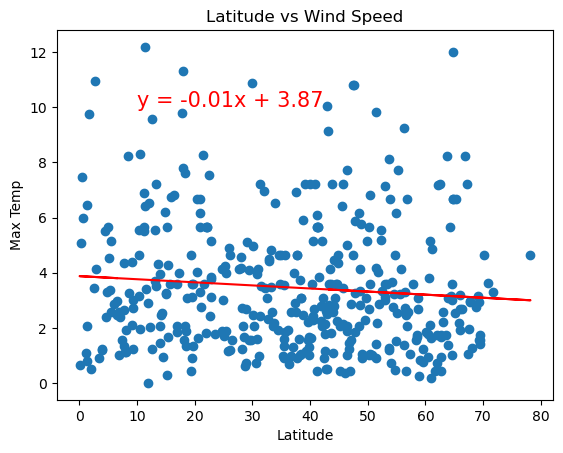

In [98]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

regress_values, r_squared, line_eq = linear_regression(x_values, y_values)

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq, (10, 10), fontsize=15, color="red")
plt.title("Latitude vs Wind Speed")
print(f"r^2 value is: {r_squared}")

plt.show()

r^2 value is: 0.008814898933646323


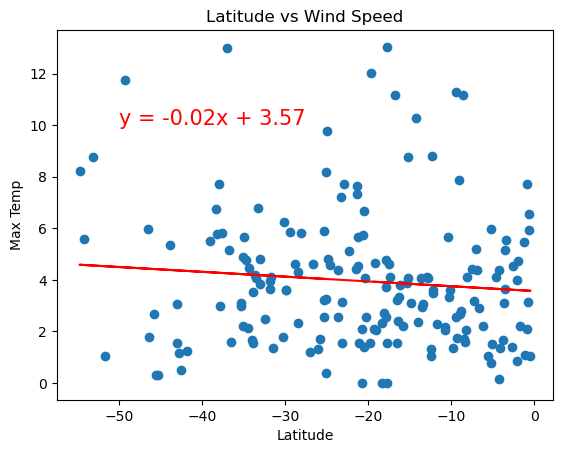

In [100]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

regress_values, r_squared, line_eq = linear_regression(x_values, y_values)

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq, (-50, 10), fontsize=15, color="red")
plt.title("Latitude vs Wind Speed")
print(f"r^2 value is: {r_squared}")

plt.show()

**Discussion about the linear relationship:** For both the Northern and Southern hemispheres, there is no correlation between latitude and humidity. The r^2 value is too low to show any correlation and there is almost no slope on the line. 